# Questions to consider:
1. Women and children first is a historical code of conduct whereby the lives of women and children were to be saved first in a life-threatening situation. Did this hold true on the Titanic?

2. Passenger class played an important role on the Titanic. Those in the upper class are more likely to survive given their influence and wealth. Did more passengers in the upper class survive? Did those in upper class pay more for their ticket?

3. Passengers embarked from Cherbourg, Queenstown and Southampton. How did this effect whether they survived or not?

4. Would having a large family on the Titanic be good for survival?

In [481]:
import pandas as pd
import seaborn as sns 

In [482]:
# use pandas to import CSV
df = pd.read_csv("titanic_data.csv")

In [483]:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat - Lifeboat (if survived)
# body - Body number (if did not survive and body was recovered)

In [484]:
# use info() to see information on each column of data
# which columns do we need for the analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [485]:
# df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# df.info()

In [486]:
# Fare is an example of continous data. We can use describe() to quickly get a sense for the data in this column
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [487]:
# What other column is continous?

In [488]:
# Sex is an exmample of categorical data. We can use value_counts() to count the number of records in each category

In [489]:
# Women and children! 
# https://youtu.be/uAotd1YvRf8?t=44

# use a function to group the records into to groups - women/children and men
# assume children are aged less than 13

def person_group(person):
    age, sex = person
    return 'woman/child' if age < 13 or sex == 'female' else sex

df['person_group'] = df[['Age', 'Sex']].apply(person_group,axis=1)

In [490]:
# how many people in each group?
df.person_group.value_counts()

male           540
woman/child    351
Name: person_group, dtype: int64

In [491]:
# how many survived in each group?
survival_count = df[['person_group', 'Survived']].groupby(['person_group'], as_index=False).count()
survival_count

,person_group,Survived
0,male,540
1,woman/child,351


In [492]:
survival_avg = df[['person_group', 'Survived']].groupby(['person_group'], as_index=False).mean()
survival_avg

,person_group,Survived
0,male,0.162963
1,woman/child,0.723647


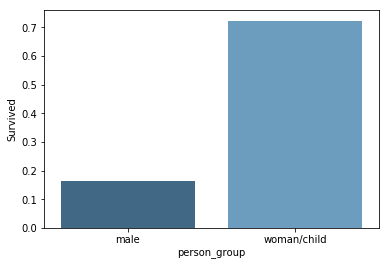

In [493]:
# vizualize this results
# It's clear that a larger proportion of women and children survived relative to men
sns.barplot(x='person_group', y='Survived', data=survival_avg, palette="Blues_d")

Passenger class played an important role on the Titanic. Those in the upper class are more likely to survive given their influence and wealth. Did more passengers in the upper class survive? Did those in upper class pay more for their ticket?

In [494]:
# first look at survival based on class
# count how many people survived in each class 
class_survival_count = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()
class_survival_count

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [495]:
# what proprotion of each class survived 
class_survival_avg = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
class_survival_avg

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


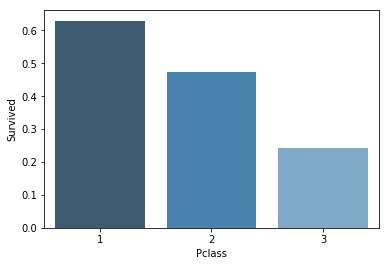

In [496]:
# vizualize the differnce between classes
sns.barplot(x='Pclass', y='Survived', data=class_survival_avg, palette='Blues_d')

In [497]:
# Did those in upper class pay more for their ticket?
df[df.Pclass == 1].Fare.describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [498]:
df[(df.Pclass == 2) | (df.Pclass == 3)].Fare.describe()

count    675.000000
mean      15.580055
std       12.626406
min        0.000000
25%        7.854200
50%       10.500000
75%       19.500000
max       73.500000
Name: Fare, dtype: float64

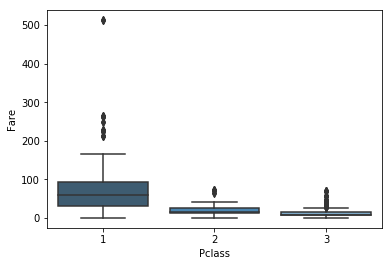

In [499]:
# visualize Fare distribution by class 
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Blues_d')

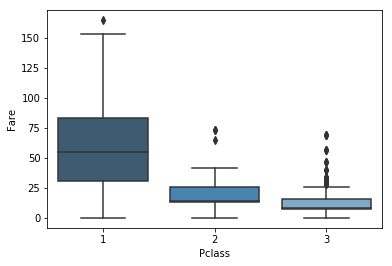

In [500]:
# visualize based on fares less than 300 
sns.boxplot(x='Pclass', y='Fare', data=df[df['Fare'] < 200], palette='Blues_d')

In [501]:
# Question 3: What type of passengers came from where and how did this effect their survival?
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [502]:
# count the number of 
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count()

,Embarked,Survived
0,C,168
1,Q,77
2,S,644


In [503]:
embarked_survival_avg = df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
embarked_survival_avg

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


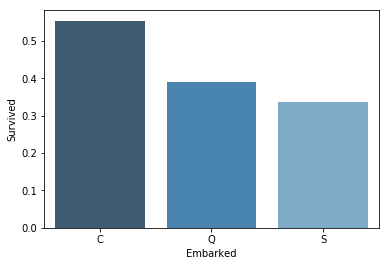

In [504]:
sns.barplot(y='Survived', x='Embarked', data=embarked_survival_avg, palette='Blues_d')

In [505]:
# 4. Would having a large family on the Titanic be good for survival? 

In [506]:
# create a new column family count from sibling and parch columns
df['family_count'] = df.SibSp + df.Parch

In [507]:
# use family count to create a new column that indicates if they have a family (1) or not (0)
def has_family(family_count):
    return 1 if family_count > 0 else 0

df['Family'] = df.family_count.apply(has_family)

In [508]:
# how many people had a family
df.Family.value_counts()

0    537
1    354
Name: Family, dtype: int64

In [509]:
# what percentage of those with a family survived? what percentage did not?
family_count_survival_percentage = df[['Family', "Survived"]].groupby(['Family'], as_index=False).mean()
family_count_survival_percentage

,Family,Survived
0,0,0.303538
1,1,0.505650


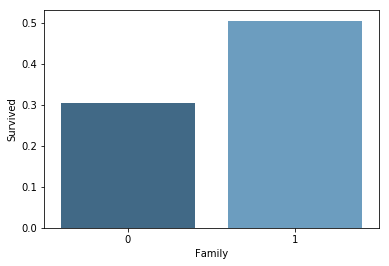

In [510]:
# visualize this break down
sns.barplot(x='Family', y='Survived', data=family_count_survival_percentage, palette='Blues_d')

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
person_group    891 non-null object
family_count    891 non-null int64
Family          891 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [512]:
# what columns are remaining
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'person_group',
       'family_count', 'Family'], dtype=object)

In [513]:
# what columns should we keep 
df = df[['Survived', "Pclass", "Sex", 'Family']]

In [514]:
# df.Age = df.Age.interpolate()

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Family      891 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ KB


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Family      891 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ KB


In [517]:
df.head()

,Survived,Pclass,Sex,Family
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0


In [518]:
# from sklearn.preprocessing import StandardScaler
# df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))


In [519]:
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [520]:
df.head()

,Survived,Pclass,Sex,Family
0,0,3,1,1
1,1,1,0,1
2,1,3,0,0
3,1,1,0,1
4,0,3,1,0


In [521]:
from sklearn.model_selection import train_test_split
survived = df['Survived']
df.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, survived, test_size=0.1, random_state=42)

In [522]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.8111111111111111


In [523]:
model.predict([[2, 1, 1], [0,0,1]])

array([0, 1])

In [524]:
jack = [2, 1, 0]
rose = [0, 0, 1]
model.predict([jack, rose])

array([0, 1])